In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files

In [4]:
uploaded = files.upload()

Saving ProyeccionesDANE.csv to ProyeccionesDANE.csv


In [5]:
tabla = pd.read_csv(io.BytesIO(uploaded['ProyeccionesDANE.csv']))
print(tabla)

     Año  Población
0   1993   35032308
1   1994   35629174
2   1995   36229830
3   1996   36830574
4   1997   37426532
5   1998   38012359
6   1999   38585016
7   2000   39140080
8   2001   39674811
9   2002   40190679
10  2003   40693254
11  2004   41188093
12  2005   41671878
13  2006   42170126
14  2007   42658630
15  2008   43134017
16  2009   43608630
17  2010   44086292
18  2011   44553416
19  2012   45001571
20  2013   45434942
21  2014   45866010
22  2015   46313898
23  2016   46830116
24  2017   47419200
25  2018   48258494
26  2019   49395678
27  2020   50372424
28  2021   51049498


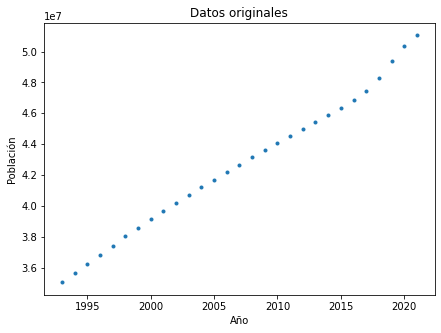

In [6]:
plt.figure(figsize = (7,5))
plt.plot(tabla['Año'], tabla['Población'],'.')
plt.title('Datos originales',)
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

Haremos una interpolación cúbica para estimar la proyección mensual de población de los años mostrados.

In [8]:
from scipy import interpolate

In [11]:
y = np.array(tabla['Población'])
x = np.array(tabla['Año'])

In [12]:
sprep = interpolate.splrep(x, y, s=0)

In [13]:
x,y

(array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([35032308, 35629174, 36229830, 36830574, 37426532, 38012359,
        38585016, 39140080, 39674811, 40190679, 40693254, 41188093,
        41671878, 42170126, 42658630, 43134017, 43608630, 44086292,
        44553416, 45001571, 45434942, 45866010, 46313898, 46830116,
        47419200, 48258494, 49395678, 50372424, 51049498]))

Como son $28$ años y queremos datos mensuales, haremos una división de $336 (28\cdot12)$

In [14]:
M = 336 #valores intermedios
xint1 = np.linspace(x[0], x[28], M)
yint1 = interpolate.splev(xint1, sprep, der=0)

In [15]:
xint1,yint1

(array([1993.        , 1993.08358209, 1993.16716418, 1993.25074627,
        1993.33432836, 1993.41791045, 1993.50149254, 1993.58507463,
        1993.66865672, 1993.75223881, 1993.8358209 , 1993.91940299,
        1994.00298507, 1994.08656716, 1994.17014925, 1994.25373134,
        1994.33731343, 1994.42089552, 1994.50447761, 1994.5880597 ,
        1994.67164179, 1994.75522388, 1994.83880597, 1994.92238806,
        1995.00597015, 1995.08955224, 1995.17313433, 1995.25671642,
        1995.34029851, 1995.4238806 , 1995.50746269, 1995.59104478,
        1995.67462687, 1995.75820896, 1995.84179104, 1995.92537313,
        1996.00895522, 1996.09253731, 1996.1761194 , 1996.25970149,
        1996.34328358, 1996.42686567, 1996.51044776, 1996.59402985,
        1996.67761194, 1996.76119403, 1996.84477612, 1996.92835821,
        1997.0119403 , 1997.09552239, 1997.17910448, 1997.26268657,
        1997.34626866, 1997.42985075, 1997.51343284, 1997.59701493,
        1997.68059701, 1997.7641791 , 1997.84776

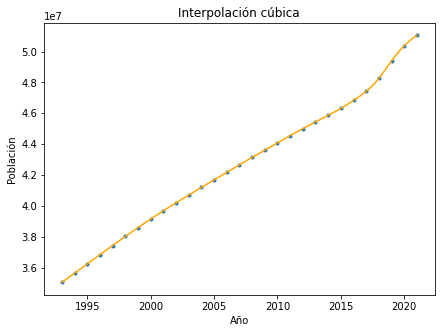

In [16]:
plt.figure(figsize = (7,5))
plt.plot(tabla['Año'], tabla['Población'],'.') #datos originales en puntos azules
plt.plot(xint1,yint1, 'orange') #datos con interpolación cúbica en naranja
plt.title('Interpolación cúbica',)
plt.xlabel('Año')
plt.ylabel('Población')
plt.show()

Con base en dicha interpolación, veremos en cuál mes de cuál año se presentó el cambio más drástico en la población.

In [18]:
diff_pob = np.diff(yint1) #hallamos las primeras diferencias

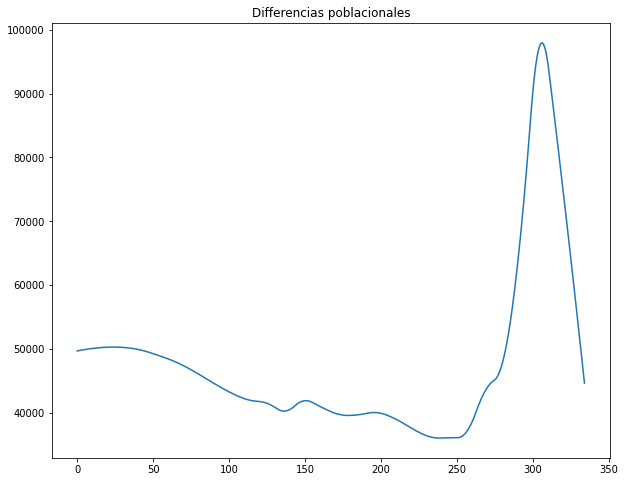

In [19]:
plt.figure(figsize = (10,8))
plt.title('Differencias poblacionales')
plt.plot(diff_pob)
plt.show()

In [20]:
diff_pob

array([49657.15885042, 49705.87837825, 49752.56925431, 49797.23147858,
       49839.86505105, 49880.46997172, 49919.04624061, 49955.59385769,
       49990.11282301, 50022.6031365 , 50053.06479823, 50081.49780814,
       50107.90216627, 50132.27787262, 50154.62492716, 50174.94332992,
       50193.23308086, 50209.49418004, 50223.72662741, 50235.930423  ,
       50246.1055668 , 50254.25205878, 50260.36989899, 50264.45903896,
       50266.35614736, 50265.53334098, 50261.88417096, 50255.40863736,
       50246.10674015, 50233.97847933, 50219.02385491, 50201.24286689,
       50180.63551527, 50157.20180002, 50130.94172119, 50101.85509115,
       50069.73566929, 50033.98329908, 49994.48941643, 49951.25402126,
       49904.27711364, 49853.55869352, 49799.09876095, 49740.89731586,
       49678.95435832, 49613.26988828, 49543.84390578, 49470.67777532,
       49394.46467781, 49317.02353085, 49238.64907275, 49159.34130358,
       49079.10022325, 48997.92583182, 48915.81812929, 48832.7771156 ,
      

In [21]:
max_dif = max(diff_pob) #buscamos el valor máximo entre las diferencias
max_dif

98006.47590333223

In [22]:
np.where(diff_pob == max_dif) #hallamos la posición de la máxima diferencia

(array([306]),)

In [23]:
int(1993 + (306/12)) #dividimos por 12 y sumamos al año 0 para hallar el año, usando la función piso

2018

In [24]:
306%12 #aplicamos función módulo para hallar el mes

6

El cambio poblacional más fuerte ocurrió en el mes de junio del año 2018.

Ahora haremos varios ajustes de curva polinomial para elegir el que mejor representa los datos poblacionales.

In [25]:
tabla_predicciones = tabla.copy()

In [27]:
y2 = np.array(tabla_predicciones['Población'])
x2 = np.array(tabla_predicciones['Año'])

In [28]:
x2,y2

(array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([35032308, 35629174, 36229830, 36830574, 37426532, 38012359,
        38585016, 39140080, 39674811, 40190679, 40693254, 41188093,
        41671878, 42170126, 42658630, 43134017, 43608630, 44086292,
        44553416, 45001571, 45434942, 45866010, 46313898, 46830116,
        47419200, 48258494, 49395678, 50372424, 51049498]))

In [29]:
from numpy.polynomial.polynomial import polyval

#### Ajuste grado 1

In [33]:
grad = 1
c = np.polyfit(x2, y2, grad)

In [34]:
c

array([ 5.29747365e+05, -1.02056650e+09])

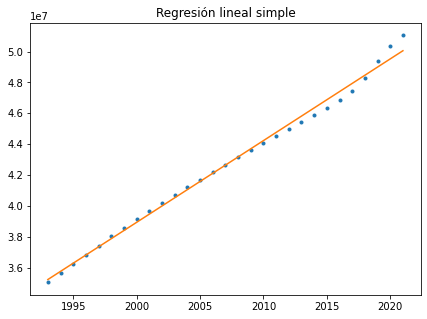

In [35]:
tabla_predicciones['Ajuste grado 1'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Regresión lineal simple')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 1'])
plt.show()

### Ajuste grado 2

In [36]:
grad = 2
c = np.polyfit(x2, y2, grad)

In [37]:
c

array([ 1.65412731e+03, -6.10991966e+06,  5.64222358e+09])

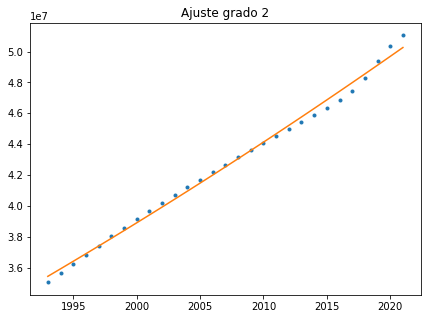

In [38]:
tabla_predicciones['Ajuste grado 2'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Ajuste grado 2')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 2'])
plt.show()

### Ajuste grado 3

In [39]:
grad = 3
c = np.polyfit(x2, y2, grad)

In [40]:
c

array([ 6.42371964e+02, -3.86606747e+06,  7.75632651e+09, -5.18731962e+12])

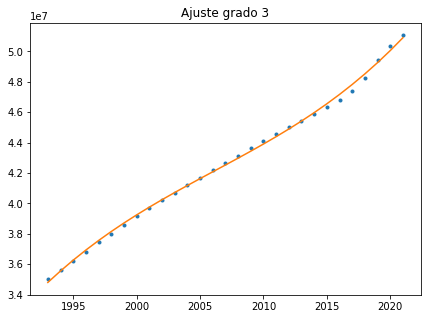

In [41]:
tabla_predicciones['Ajuste grado 3'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Ajuste grado 3')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 3'])
plt.show()

### Ajuste grado 4

In [42]:
grad = 4
c = np.polyfit(x2, y2, grad)

In [43]:
c

array([ 4.21427259e+01, -3.37679431e+05,  1.01464417e+09, -1.35499014e+12,
        6.78555505e+14])

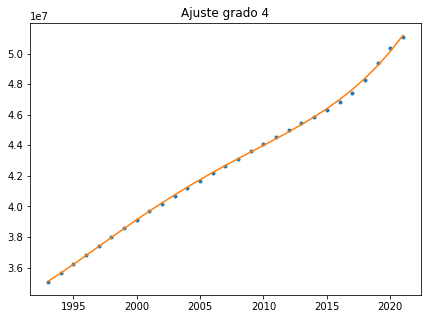

In [44]:
tabla_predicciones['Ajuste grado 4'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Ajuste grado 4')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 4'])
plt.show()

### Ajuste grado 5

In [45]:
grad = 5
c = np.polyfit(x2, y2, grad)

In [46]:
c

array([ 1.59483984e+00, -1.59620785e+04,  6.39029091e+07, -1.27914762e+11,
        1.28023465e+14, -5.12527729e+16])

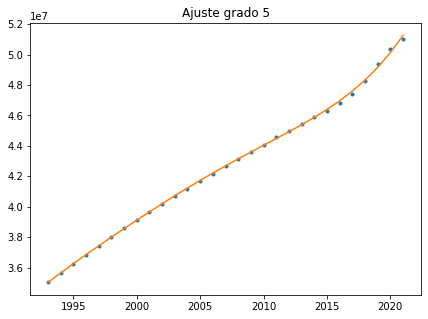

In [47]:
tabla_predicciones['Ajuste grado 5'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Ajuste grado 5')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 5'])
plt.show()

### Ajuste grado 6

In [48]:
grad = 6
c = np.polyfit(x2, y2, grad)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
c

array([ 3.94314200e-04, -3.15599610e+00,  7.88769891e+03,  4.78550364e+04,
       -3.17476284e+10,  5.07812505e+13, -2.54022438e+16])

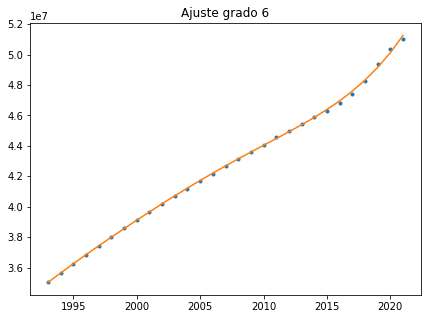

In [50]:
tabla_predicciones['Ajuste grado 6'] = np.polyval(c, tabla_predicciones['Año'])

plt.figure(figsize = (7,5))
plt.title('Ajuste grado 6')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 6'])
plt.show()

In [51]:
display(tabla_predicciones)

,Año,Población,Ajuste grado 1,Ajuste grado 2,Ajuste grado 3,Ajuste grado 4,Ajuste grado 5,Ajuste grado 6
0,1993,35032308,3.522000e+07,3.542842e+07,3.479710e+07,3.509294e+07,35018104.0,35018624.0
1,1994,35629174,3.574975e+07,3.591351e+07,3.555275e+07,3.563728e+07,35642464.0,35642636.0
2,1995,36229830,3.627950e+07,3.640190e+07,3.626161e+07,3.620526e+07,36249032.0,36249012.0
3,1996,36830574,3.680925e+07,3.689361e+07,3.692752e+07,3.678809e+07,36841704.0,36841620.0
4,1997,37426532,3.733899e+07,3.738862e+07,3.755435e+07,3.737800e+07,37423112.0,37423152.0
5,1998,38012359,3.786874e+07,3.788694e+07,3.814594e+07,3.796822e+07,37995048.0,37995124.0
6,1999,38585016,3.839849e+07,3.838856e+07,3.870615e+07,3.855299e+07,38558024.0,38558180.0
7,2000,39140080,3.892823e+07,3.889350e+07,3.923884e+07,3.912758e+07,39112064.0,39112324.0
8,2001,39674811,3.945798e+07,3.940174e+07,3.974785e+07,3.968825e+07,39656736.0,39656988.0
9,2002,40190679,3.998773e+07,3.991329e+07,4.023705e+07,4.023228e+07,40191072.0,40191280.0


### Comparación ajustes

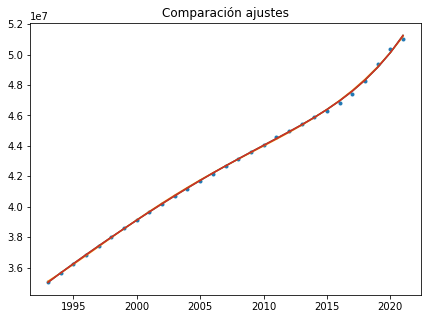

In [52]:
plt.figure(figsize = (7,5))
plt.title('Comparación ajustes')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Población'],'.')
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 4'])
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 5'])
plt.plot(tabla_predicciones['Año'], tabla_predicciones['Ajuste grado 6'])
plt.show()

In [53]:
x_zoomin = np.linspace(2018, 2021, 29)

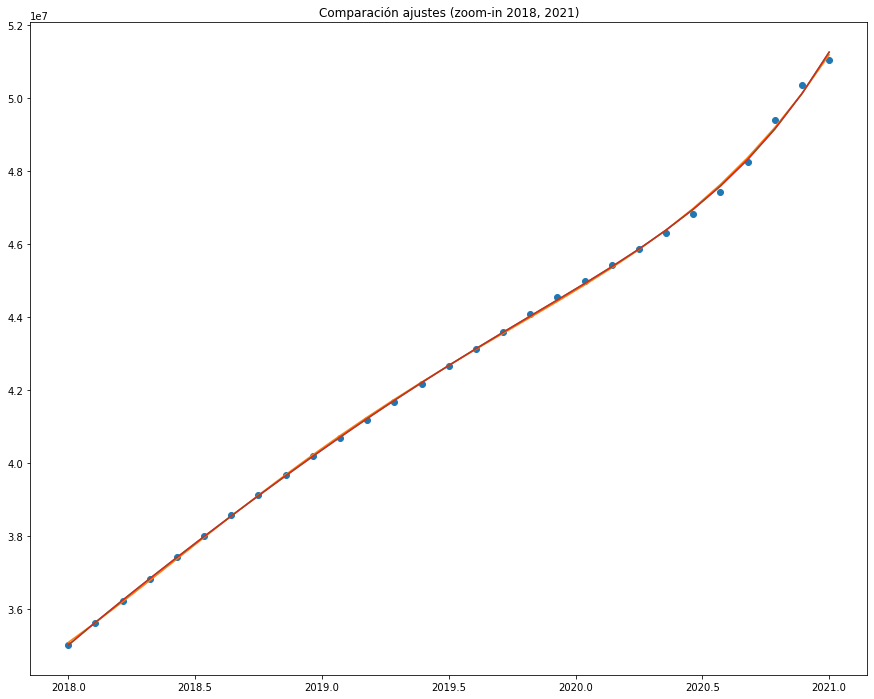

In [54]:
plt.figure(figsize = (15,12))
plt.title('Comparación ajustes (zoom-in 2018, 2021)')
plt.plot(x_zoomin, tabla_predicciones['Población'],'o')
plt.plot(x_zoomin, tabla_predicciones['Ajuste grado 4'])
plt.plot(x_zoomin, tabla_predicciones['Ajuste grado 5'])
plt.plot(x_zoomin, tabla_predicciones['Ajuste grado 6'])
plt.show()

Está gráfica con acercamiento a los años $2018-2021$ tampoco nos muestra diferencias significativas entre los ajustes de grado 4, 5 y 6.<br/>

Implementaremos una función que halle el error entre los datos originales y los arrojados por los ajustes.

In [55]:
def error(n, m):
  err = []
  err = [0 for i in range(len(n))]
  for i in range(len(n)):
    err[i] = n[i] - m[i]
  return err

In [56]:
poblacion = tabla_predicciones['Población']
p4 = tabla_predicciones['Ajuste grado 4']
p5 = tabla_predicciones['Ajuste grado 5']
p6 = tabla_predicciones['Ajuste grado 6']

In [57]:
tabla_predicciones['Error p_4'] = error(poblacion,p4)  
tabla_predicciones['Error p_5'] = error(poblacion,p5)
tabla_predicciones['Error p_6'] = error(poblacion,p6)

In [58]:
display(tabla_predicciones)

,Año,Población,Ajuste grado 1,Ajuste grado 2,Ajuste grado 3,Ajuste grado 4,Ajuste grado 5,Ajuste grado 6,Error p_4,Error p_5,Error p_6
0,1993,35032308,3.522000e+07,3.542842e+07,3.479710e+07,3.509294e+07,35018104.0,35018624.0,-60633.000,14204.0,13684.0
1,1994,35629174,3.574975e+07,3.591351e+07,3.555275e+07,3.563728e+07,35642464.0,35642636.0,-8104.625,-13290.0,-13462.0
2,1995,36229830,3.627950e+07,3.640190e+07,3.626161e+07,3.620526e+07,36249032.0,36249012.0,24572.250,-19202.0,-19182.0
3,1996,36830574,3.680925e+07,3.689361e+07,3.692752e+07,3.678809e+07,36841704.0,36841620.0,42483.625,-11130.0,-11046.0
4,1997,37426532,3.733899e+07,3.738862e+07,3.755435e+07,3.737800e+07,37423112.0,37423152.0,48533.250,3420.0,3380.0
5,1998,38012359,3.786874e+07,3.788694e+07,3.814594e+07,3.796822e+07,37995048.0,37995124.0,44141.375,17311.0,17235.0
6,1999,38585016,3.839849e+07,3.838856e+07,3.870615e+07,3.855299e+07,38558024.0,38558180.0,32023.750,26992.0,26836.0
7,2000,39140080,3.892823e+07,3.889350e+07,3.923884e+07,3.912758e+07,39112064.0,39112324.0,12499.750,28016.0,27756.0
8,2001,39674811,3.945798e+07,3.940174e+07,3.974785e+07,3.968825e+07,39656736.0,39656988.0,-13439.250,18075.0,17823.0
9,2002,40190679,3.998773e+07,3.991329e+07,4.023705e+07,4.023228e+07,40191072.0,40191280.0,-41602.125,-393.0,-601.0


### Eligiendo el mejor ajuste

Sacamos el promedio del error de los ajustes 4, 5 y 6.

In [59]:
np.mean(p4)

42636466.12068965

In [60]:
np.mean(p5)

42636409.93103448

In [61]:
np.mean(p6)

42636546.48275862

In [62]:
np.mean(p5)<np.mean(p4)<np.mean(p6)

True

Vemos que el ajuste que mejor representa la población es el ajuste de grado 5.

Ahora estimaremos la población de cada
año a partir de 2022 y hasta 2032.

In [63]:
tabla_estimacion = tabla.copy()

In [65]:
y3 = np.array(tabla_estimacion['Población'])
x3 = np.array(tabla_estimacion['Año'])

In [66]:
x3,y3

(array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([35032308, 35629174, 36229830, 36830574, 37426532, 38012359,
        38585016, 39140080, 39674811, 40190679, 40693254, 41188093,
        41671878, 42170126, 42658630, 43134017, 43608630, 44086292,
        44553416, 45001571, 45434942, 45866010, 46313898, 46830116,
        47419200, 48258494, 49395678, 50372424, 51049498]))

In [67]:
grad = 5
c = np.polyfit(x2, y2, grad)

In [68]:
c

array([ 1.59483984e+00, -1.59620785e+04,  6.39029091e+07, -1.27914762e+11,
        1.28023465e+14, -5.12527729e+16])

In [69]:
estimacion_x = np.concatenate((np.array(tabla_estimacion['Año']), np.arange(2022,2032,1)))

In [120]:
b = np.array([0]*10)

In [121]:
estimacion_y = np.concatenate((np.array(tabla_predicciones['Ajuste grado 5']), b))

In [122]:
estimacion_x,estimacion_y

(array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
        2026, 2027, 2028, 2029, 2030, 2031]),
 array([35018104., 35642464., 36249032., 36841704., 37423112., 37995048.,
        38558024., 39112064., 39656736., 40191072., 40714024., 41224712.,
        41722344., 42206856., 42678384., 43138248., 43588560., 44032680.,
        44475504., 44923392., 45384392., 45868784., 46388688., 46958752.,
        47596312., 48321048., 49155896., 50126856., 51263096.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.]))

### Esta gráfica nos sirve para ver el crecimiento de la población hasta 2032.

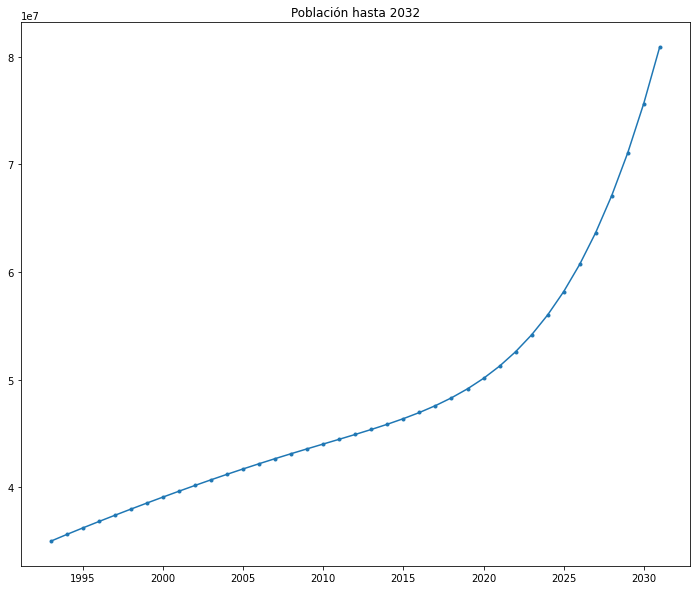

In [115]:
w = np.polyval(c, estimacion_x)

plt.figure(figsize = (12,10))
plt.title('Población hasta 2032')
plt.plot(estimacion_x, w,'.-')
plt.show()

In [116]:
data = (estimacion_x, w)

In [118]:
import pandas as pd

df = pd.DataFrame(data)
df.to_csv('proyeccion_poblacion.csv')


In [119]:
tabla = pd.read_csv('proyeccion_poblacion.csv')
tabla.transpose()


,0,1
Unnamed: 0,0.0,1.0
0,1993.0,35018104.0
1,1994.0,35642464.0
2,1995.0,36249032.0
3,1996.0,36841704.0
4,1997.0,37423112.0
5,1998.0,37995048.0
6,1999.0,38558024.0
7,2000.0,39112064.0
8,2001.0,39656736.0


### Referencias
DANE.
Proyecciones
de
población.
https://www.dane.gov.co/
index.php/estadisticas-por-tema/demografia-y-poblacion/
proyecciones-de-poblacion